# 서포트 벡터 머신 (SVM)
- 새로운 데이터가 입력되었을 때 기존 데이터를 활용해 분류하는 방법
- 패턴 인식, 자료 분석 등을 위한 지도 학습 모델로, 회귀와 분류 문제 해결에 사용되는 알고리즘

- 매개변수
    - <span style="color:#ffd33d">**C**</span>
        </br>: 훈련 데이터를 얼마나 엄격하게 따라야 하는지
        - 규제 강도(alpha)의 역수
        - 오류와 규제 사이의 균형을 조절
        - 작을수록 오류 허용 범위 넓어짐, 규제 강도 강해짐(단순) -> 과소적합(일반화) 위험
        - 클수록 오류 허용 범위 좁아짐, 규제 강도 약해짐(복잡) -> 과대적합 위험
        - 기본값: 1.0
    - <span style="color:#ffd33d">**kernel**</span>
        </br>: 커널 함수의 종류
        - 실제 데이터가 선형이 아닌 경우, 커널 함수를 이용하여 데이터를 고차원 공간으로 매핑해 직선으로 구분 가능하게 하는 방법
        - 기본값: 'rbf'
            - 'rbf' : 가우시안 커널 (가장 많이 사용)
            - 'linear' : 선형 SVM
            - 'poly: 다항식 커널
            - 'sigmoid' : 시그모이드 함수 기반
    - <span style="color:#ffd33d">**gamma**</span>
        </br>: 커널 계수
        - 'linear'를 제외한 커널이 선택되었을 때 사용
        - 작을수록 결정 경계가 복잡해짐 -> 과대적합 위험
        - 클수록 결정 경계가 유연해짐 -> 과소적합(일반화) 위험
        - 기본값: 'scale'
            - 고정된 숫자가 아닌 특정 계산 전략을 기본값으로 사용하는 경우가 많다.
    - <span style="color:#ffd33d">**degree**</span>
        </br>: 다항식 커널의 차수
        - 비선형 데이터의 패턴을 학습할 수 있게 해주는 변수
        - 기본값: 3
    - <span style="color:#ffd33d">**probability**</span>
        </br>: 확률 출력 여부
        - 학습할 때 속도가 느려짐
        - 기본값: False
            - True : predict_proba() 함수 사용 가능

- 주요 속성
    - <span style="color:#ffd33d">**support_**</span>
        </br>: 서포트 벡터의 인덱스 값
        - 전체 데이터에서 경계선에 붙어있는 데이터의 인덱스 값
    - <span style="color:#ffd33d">**support_vectors_**</span>
        </br>: support_의 위치(인덱스) 값에 해당하는 실제 데이터 값
    - <span style="color:#ffd33d">**n_support_**</span>
        </br>: 클래스(컬럼)별 서포트 벡터의 개수
    - <span style="color:#ffd33d">**coef_**</span>
        </br>: 결정 경계의 계수 (linear 커널인 경우에만 사용 가능)

- 메소드
    - <span style="color:#ffd33d">**fit(x, y)**</span>
    </br>: 모델의 학습 
    - <span style="color:#ffd33d">**predict(x)**</span>
    </br>: 클래스를 예측
    - <span style="color:#ffd33d">**predict_proba(x)**</span>
    </br>: 클래스별 예측 확률 (probability의 값이 True인 경우)
    - <span style="color:#ffd33d">**decision_function(x)**</span>
    </br>: 결정 함수의 값 (margin과의 거리)
    - <span style="color:#ffd33d">**score(x, y)**</span>
    </br>: 정확도 평가


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# 분류 모델에서는 기본적으로 스케일링 작업 필요
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [2]:
df = pd.read_csv('../data/classification.csv')
df.head()

,age,interest,success
0,23.657801,18.859917,0.0
1,22.573729,17.969223,0.0
2,32.553424,29.463651,0.0
3,6.718035,25.704665,1.0
4,14.401919,16.770856,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   interest  297 non-null    float64
 2   success   297 non-null    float64
dtypes: float64(3)
memory usage: 7.1 KB


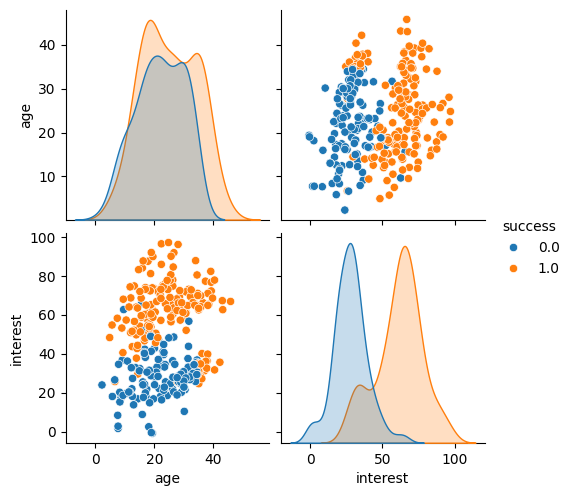

In [4]:
# 데이터 클래스 분포를 그ㅐ프로 확인
sns.pairplot(
    data= df,
    hue= "success"
)

In [5]:
# train, test로 데이터 분할
x = df[ ['age', 'interest'] ].values
y = df['success'].values

X_train, X_test, Y_train, Y_test = train_test_split(
    x, y,
    test_size= 0.3,
    stratify= y,
    random_state= 42
)

In [6]:
# 스케일러 사용
# SVM은 각 특성(컬럼)의 스케일에 매우 민감하므로 스케일링 필요
scaler = StandardScaler()

scaler.fit(X_train)

X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

In [7]:
# 스케일링된 데이터를 기준으로 학습하고 평가
clf = SVC(C= 0.5)

In [8]:
clf.fit(X_train_sc, Y_train)

,C,0.5
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [9]:
pred = clf.predict(X_test_sc)

cm = confusion_matrix(Y_test, pred)
acc = accuracy_score(Y_test, pred)
prc = precision_score(Y_test, pred)
rcll = recall_score(Y_test, pred)
f1 = f1_score(Y_test, pred)

print('혼동 행렬: ', cm)
print('정확도: ', round(acc, 2))
print('정밀도: ', round(prc, 2))
print('재현율: ', round(rcll, 2))
print('F1: ', round(f1*100, 2))

혼동 행렬:  [[36  3]
 [ 4 47]]
정확도:  0.92
정밀도:  0.94
재현율:  0.92
F1:  93.07


In [10]:
# 스케일링 되지 않은 원본의 데이터를 이용하여 학습 평가 지표 출력
clf2 = SVC(C= 0.5)
clf2.fit(X_train, Y_train)

pred2 = clf2.predict(X_test)

cm_2 = confusion_matrix(Y_test, pred2)
acc_2 = accuracy_score(Y_test, pred2)
prc_2 = precision_score(Y_test, pred2)
rcll_2 = recall_score(Y_test, pred2)
f1_2 = f1_score(Y_test, pred2)

print('혼동 행렬: ', cm_2)
print('정확도: ', round(acc_2, 2))
print('정밀도: ', round(prc_2, 2))
print('재현율: ', round(rcll_2, 2))
print('F1: ', round(f1_2*100, 2))

# 틀린 예측이 늘어남
# 컬럼 간 차이(가중치)에 민감하게 반응한다는 것을 알 수 있다.

혼동 행렬:  [[36  3]
 [ 9 42]]
정확도:  0.87
정밀도:  0.93
재현율:  0.82
F1:  87.5


In [11]:
# 분류 분석을 통하여 확인
from sklearn.svm import LinearSVC

C가 1인 경우, support_vector의 개수는 100
C가 500인 경우, support_vector의 개수는 97


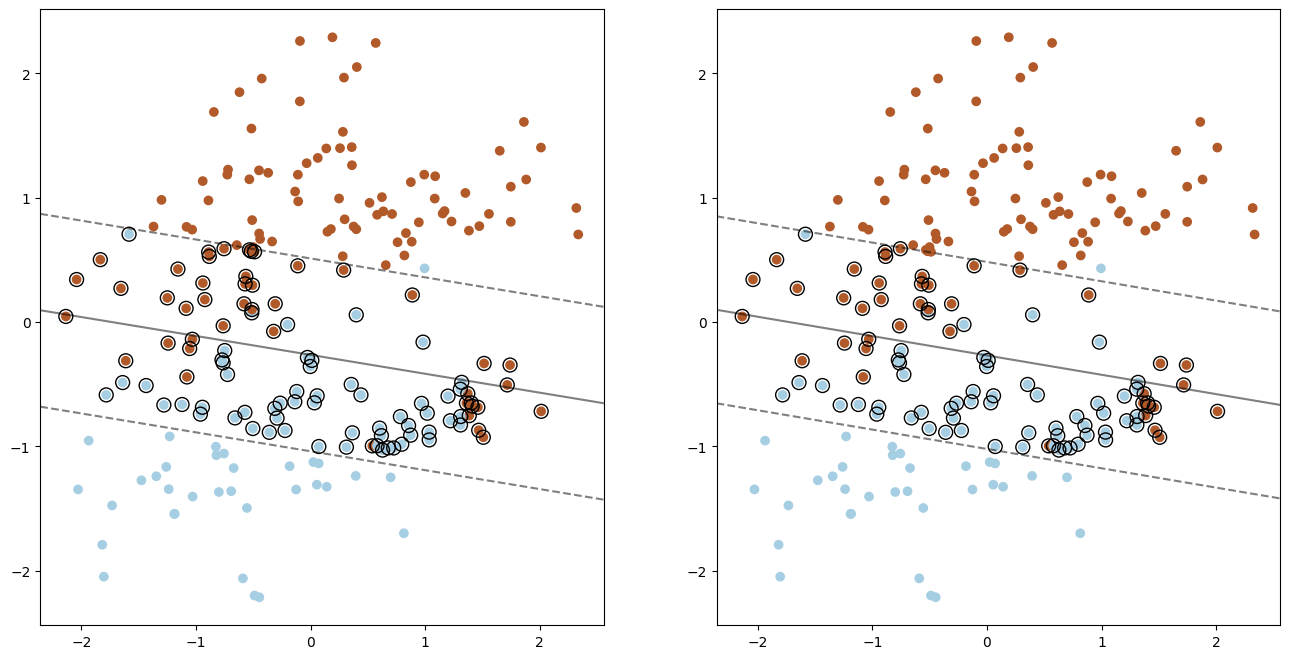

In [12]:
# 마진 영역을 그래프로 표시
plt.figure(figsize= (16, 8))

for i, c in enumerate( [1, 500] ):
    # i 에는 [1, 500] 리스트의 위치 값이 순차적으로 대입
    # c 에는 [1, 500] 리스트의 값이 순차적으로 대입
    clf = LinearSVC(C= c, random_state= 42)
    clf.fit(X_train_sc, Y_train)

    # decision_function() -> 경계선과의 거리를 의미
    decision = clf.decision_function(X_train_sc)

    # margin( -1 <= decision_function() <= 1 ) 의 데이터를 support_vector로 간주
            # 절댓값이 1보다 작거나 같은
    support_vector_indices = np.where(
        np.abs( decision ) <= 1 + 1e-15
        # decision의 절댓값이 1의 근사치보다 작거나 같은 경우
    )[0]
    support_vector = X_train_sc[support_vector_indices]

    # support_vector의 개수를 출력
    print(f'C가 {c}인 경우, support_vector의 개수는 {len(support_vector)}')

    #subplot을 이용하여 1행 2열의 영역을 생성
    plt.subplot(1, 2, i+1)

    # 학습 데이터의 산점도 그래프 생성
    plt.scatter(X_train_sc[:, 0], X_train_sc[:, 1], c= Y_train, cmap= plt.cm.Paired)  # c: 컬러 (= pairplot의 hue)

    # 현재 좌표축의 정보를 로드
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # 격자(결정 경계) 추가
    xx, yy = np.meshgrid(
        # 안 하려다가 한 번은 해봐야할 것 같아 실습하는 부분이라고 함
        # x축 범위 안에서 50개의 데이터를 생성
        np.linspace(xlim[0], xlim[1], 50),
        # y축 범위 안에서 50개의 데이터를 생성
        np.linspace(ylim[0], ylim[1], 50)
    )

    # 각 격자점에 대한 desicion_function의 값을 지정하고 행렬의 크기를 xx와 같게 변환
    z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    z = z.reshape(xx.shape)

    # 등고선을 추가
    # 결정 경계와 margin을 생성
    plt.contour(
        xx, yy, z, colors= 'k', levels= [-1, 0, 1],  # levels -> -1, 1은 margins, 0은 결정 경계
        alpha= 0.5, linestyles= ['--', '-', '--']
    )

    # support_vector의 데이터를 동그라미로 표시
    plt.scatter(
        support_vector[:, 0], support_vector[:, 1],
        s= 100,  # 크기
        linewidths= 1,
        facecolors= 'none', # face(내부)를 투명하게
        edgecolors= 'k'     # edge(테두리)를 검은색으로
    )
plt.show()

---
# SVR (Support Vector Regression)
- 서포트 벡터 회귀 분석
- 입실론 튜브 안에 들어오는 데이터는 오차로 보지 않는다.
- 입실론 튜브 밖으로 벗어나면 가중치에 대한 페널티를 줘 해당값들을 확인할 수 있게 한다.

- 매개변수
    - <span style="color:#ffd33d">**kernel**</span>
        </br>: 커널 함수의 종류
        - 실제 데이터가 선형이 아닌 경우, 커널 함수를 이용하여 데이터를 고차원 공간으로 매핑해 직선으로 구분 가능하게 하는 방법
        - 기본값: 'rbf'
            - **'rbf'**</br>: 가우시안 커널 (가장 많이 사용)
                - 사용 매개 변수: C, epsilron
                - 고차원 희소 데이터, 선형 데이터셋에 사용
            - **'linear'**</br>: 선형 SVM
                - 사용 매개 변수: C, epsilron, gamma
                - 범용 (∵성능 우수)
            - **'poly'**</br>: 다항식 커널
                - 사용 매개 변수: C, epsilron, gamma, degree
                - 다항적 경계가 자연스러운 데이터에 사용
            - **'sigmoid'**</br>: 시그모이드 함수 기반
                - 사용 매개 변수: C, epsilron, gamma
                - 신경망과 유사한 데이터 (ex. 연구용 데이터) 등 특수한 경우에 사용
    - <span style="color:#ffd33d">**epsilon**</span>
        </br>: 오차 허용의 폭
    - <span style="color:#ffd33d">**gamma**</span>
        </br>: 데이터 간 영향의 범위

- 속성
    - <span style="color:#ffd33d">**dual_coef_**</span>
        </br>: 쌍대 문제의 alpha 값들
    - <span style="color:#ffd33d">**coef_**</span>
        </br>: 회귀계수

In [13]:
# 랜덤 데이터 생성
x = np.sort(
    5 * np.random.rand(40, 1), axis= 0 
)
y = np.sin(x).ravel()

# print(x, y)
print(y[:10])

[0.03756191 0.05741709 0.20920023 0.28404515 0.41610058 0.42726622
 0.89472193 0.96804828 0.97516782 0.99998932]


In [14]:
# 타깃 데이터(종속 변수)에 노이즈 추가
# 노이즈를 추가하지 않으면 확률이 너무 높게 나온다.
y[::5] += 3*(0.5-np.random.rand(8))
print(y[:10])

[ 0.83395673  0.05741709  0.20920023  0.28404515  0.41610058 -0.94411281
  0.89472193  0.96804828  0.97516782  0.99998932]


In [15]:
# 회귀 모델에 (rbf, 선형, 다항)
from sklearn.svm import SVR

In [16]:
svr_rbf = SVR(kernel= 'rbf', C= 100, gamma= 0.1, epsilon= 0.1)
svr_lin = SVR(kernel= 'linear', C= 100, gamma= 'auto', epsilon= 0.1)
svr_poly = SVR(kernel= 'poly', C= 100, gamma= 'auto', epsilon= 0.1, coef0= 1)

In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [18]:
# 학습
svr_rbf.fit(x, y)
svr_lin.fit(x, y)
svr_poly.fit(x, y)

,kernel,'poly'
,degree,3
,gamma,'auto'
,coef0,1
,tol,0.001
,C,100
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


In [19]:
# 예측 데이터 생성
pred_rbf = svr_rbf.predict(x)
pred_lin = svr_lin.predict(x)
pred_poly = svr_poly.predict(x)

In [20]:
# 평가 지표를 데이터프레임으로 생성
index = ['RBF', 'Lin', 'poly']
cols = ['MSE', 'RMSE', 'MAE', 'R2']
result = pd.DataFrame(index= index, columns= cols)
result

# 데이터를 넣어두지 않아 전부 NaN으로 출력됨

,MSE,RMSE,MAE,R2
RBF,NaN,NaN,NaN,NaN
Lin,NaN,NaN,NaN,NaN
poly,NaN,NaN,NaN,NaN


In [21]:
# 예측 값들을 리스트로 생성
preds = [pred_rbf, pred_lin, pred_poly]

for pred, i in zip(preds, index):
    # pred 에는 예측 값들이 대입
    # i 에는 커널 값들이 대입
    mse = mean_squared_error(y, pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y, pred)
    r2 = r2_score(y, pred)

    result.loc[i, 'MSE'] = mse
    result.loc[i, 'RMSE'] = rmse
    result.loc[i, 'MAE'] = mae
    result.loc[i, 'R2'] = r2

In [22]:
result

,MSE,RMSE,MAE,R2
RBF,0.17628,0.419858,0.249929,0.719848
Lin,0.465664,0.682396,0.470354,0.259947
poly,0.200438,0.447703,0.232623,0.681456


#### 연습
boston 데이터를 이용하여 SVR의 RBF, Lin, Poly 모델 중 어떤 것의 성능이 가장 높은지 검증
1. csv 폴더 안의 boston 데이터를 로드한다. (--> 문자가 없는 데이터)
2. 독립, 종속 변수로 데이터를 나눠준다.
3. train, test를 8:2의 비율로 분할한다.
4. RBF, Lin, Poly 모델을 생성한다.
5. train 데이터를 학습한다.
6. test 데이터를 이용하여 예측한다.
7. 각각 모델의 평가 지표를 생성하여 우수한 kernel 함수를 선택한다.

In [23]:
# 1. csv 폴더 안의 boston 데이터를 로드한다.
boston = pd.read_csv('../csv/boston.csv')
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [24]:
# 2. 독립, 종속 변수로 데이터를 나눠준다.
x = boston.drop('Price', axis= 1).values
y = boston['Price'].values

In [25]:
# 3. train, test를 8:2의 비율로 분할한다.
X_train, X_test, Y_train, Y_test = train_test_split(
    x, y,
    test_size= 0.2,
    random_state= 42
)

In [26]:
# 4. RBF, Lin, Poly 모델을 생성한다.
svr_rbf = SVR(kernel= 'rbf', C= 100, gamma= 0.1, epsilon= 0.1)
svr_lin = SVR(kernel= 'linear', C= 100, gamma= 'auto', epsilon= 0.1)
svr_poly = SVR(kernel= 'poly', C= 100, gamma= 'auto', epsilon= 0.1, coef0= 1)

In [ ]:
# 5. train 데이터를 학습한다.
svr_rbf.fit(x, y)
svr_lin.fit(x, y)
svr_poly.fit(x, y)

In [ ]:
# 6. test 데이터를 이용하여 예측한다.
pred_rbf = svr_rbf.predict(x)
pred_lin = svr_lin.predict(x)
pred_poly = svr_poly.predict(x)

In [ ]:
# 7. 각각 모델의 평가 지표를 생성하여 우수한 kernel 함수를 선택한다.
index = ['RBF', 'Lin', 'poly']
cols = ['MSE', 'RMSE', 'MAE', 'R2']
result = pd.DataFrame(index= index, columns= cols)
result